In [27]:
print('Hello World, I am Zohaib')

Hello World, I am Zohaib


In [28]:
import numpy as np

In [29]:
import os 
from dotenv import load_dotenv
import mysql.connector 

# from mysql import connector

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ss
from sql_query_command import read_query

# built in modules : os , datetime , random
# 3rd party modules : dotenv , numpy , pandas
# user defined/custom modules : defined by user for specific project


In [30]:
query = """show tables;"""
cursor.execute(query)
tables = cursor.fetchall()

In [31]:
for row in tables:
    print(row)

('categories',)
('customers',)
('employees',)
('salesdata',)
('subcategories',)
('suppliers',)


In [32]:
cursor.column_names

('Tables_in_swiftmarket',)

In [33]:
pd.DataFrame(data=tables,columns=cursor.column_names)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [34]:
query = """Select * from salesdata;"""
df = read_query(query)
df.head()

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00


In [35]:
query = """Select * from subcategories;"""
df = read_query(query)
df.head()

,SubcatID,SubcatName,CategoryID,UnitPrice,SupplierID
0,6001,Smartphones,500100,9599.00,3054
1,6002,Laptops,500100,88216.00,3078
2,6003,Smartwatches,500100,63444.00,3083
3,6004,Wireless headphones,500100,63946.00,3075
4,6005,Portable power banks,500100,34847.00,3069


In [36]:
query = """Select sb.SubCatname , sum(s.TotalPrice) as TotalSales
from salesdata s 
inner join subcategories sb on s.subcatid = sb.subcatid
group by sb.subcatname
order by totalsales desc
limit 5;"""
df = read_query(query)
df.head()

,SubCatname,TotalSales
0,Pet beds,119604888.00
1,Laptops,112563616.00
2,Air fryer,100686176.00
3,Fiction novels,99827500.00
4,Camping stove,95899496.00


In [37]:
# bar chart 
labels = df['SubCatname'].values
sales = df['TotalSales'].astype(float).values

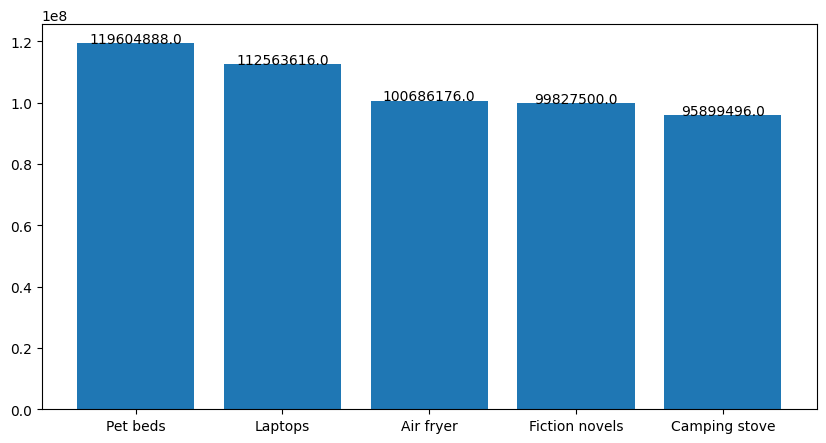

In [38]:
plt.figure(figsize=(10,5))
plt.bar(labels,sales)
for i in range(len(labels)):
    plt.annotate(text=sales[i],xy=(i,sales[i]),
                 horizontalalignment='center')


In [39]:
## 1

query = """select month(saledate), Monthname(SaleDate) as SaleMonth,sum(TotalPrice) as TotalSales
from Salesdata
group by month(saledate), SaleMonth
order by month(saledate), SaleMonth;"""
df = read_query(query)
df.head()
print(df)

    month(saledate)  SaleMonth    TotalSales
0                 1    January  155340130.00
1                 2   February  140345189.00
2                 3      March  151612551.00
3                 4      April  150691604.00
4                 5        May  163734120.00
5                 6       June  143529379.00
6                 7       July  149811843.00
7                 8     August  158477094.00
8                 9  September  146743920.00
9                10    October  143488837.00
10               11   November  148468105.00
11               12   December  137031316.00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month(saledate)  12 non-null     int64 
 1   SaleMonth        12 non-null     object
 2   TotalSales       12 non-null     object
dtypes: int64(1), object(2)
memory usage: 420.0+ bytes


In [41]:
df['TotalSales'] = df['TotalSales'].astype(float)

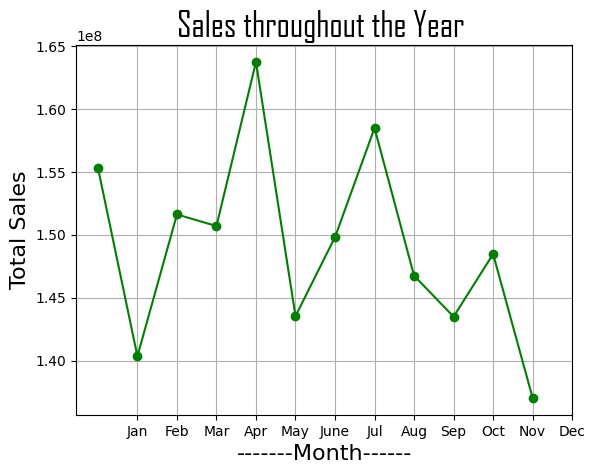

In [42]:
plt.plot(df['SaleMonth'],df['TotalSales'],marker="o",color='GREEN')
plt.grid()
plt.title("Sales throughout the Year " , font = "Agency FB" , size = 25)
plt.xlabel("-------Month------",size=16)
plt.ylabel("Total Sales",size=16)   
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [43]:
## 2

query = """ select months,
AVG(monthlysales) OVER (ORDER BY monthnum ROWS BETWEEN 3
PRECEDING AND CURRENT ROW) AS MovingAverage
from
(SELECT
month(saledate) monthnum,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
FROM Salesdata
Group by month(saledate),monthname(saledate)) t;"""
df = read_query(query)
df.head()
print(df)

       months     MovingAverage
0     January  155340130.000000
1    February  147842659.500000
2       March  149099290.000000
3       April  149497368.500000
4         May  151595866.000000
5        June  152391913.500000
6        July  151941736.500000
7      August  153888109.000000
8   September  149640559.000000
9     October  149630423.500000
10   November  149294489.000000
11   December  143933044.500000


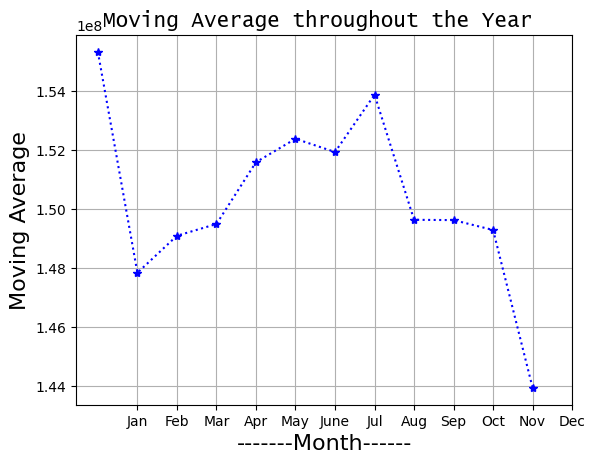

In [44]:
plt.plot(df['months'],df['MovingAverage'],color='blue',linestyle='dotted',marker='*')
plt.grid()
plt.title("Moving Average throughout the Year " , font = "Lucida Console" , size = 15)
plt.xlabel("-------Month------",size=16)
plt.ylabel("Moving Average",size=16)   
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [45]:
## 4

query = """select s.employeeid,e.firstname,s.totalsales
from
(select employeeid,sum(totalprice) as totalsales
from salesdata
group by EmployeeID) s
join employees e
on s.employeeid=e.EmployeeID
order by s.totalsales desc;"""
df = read_query(query)
df.head()
print(df)



     employeeid firstname   totalsales
0          1115    Yuvaan  20895341.00
1          1017      Tiya  19035834.00
2          1029     Shaan  18649467.00
3          1074    Stuvan  18333919.00
4          1001     Fateh  18231579.00
..          ...       ...          ...
115        1005      Keya  11565845.00
116        1019    Nitara  11412116.00
117        1015      Heer  11399241.00
118        1072    Kimaya  10898982.00
119        1045      Pihu  10893657.00

[120 rows x 3 columns]


In [46]:
## 5

query = """ select employeeid , sum(TotalPrice) as TotalSales
from SalesData
group by employeeid
order by totalsales desc
limit 5 ;
"""
df = read_query(query)
df.head()
print(df)

   employeeid   TotalSales
0        1115  20895341.00
1        1017  19035834.00
2        1029  18649467.00
3        1074  18333919.00
4        1001  18231579.00


In [47]:
## 7

query = """ select state, count(*) as TotalCustomers
from Customers 
group by state
;
"""
df = read_query(query)
print(df)



                state  TotalCustomers
0               Assam              10
1             Tripura              10
2            Nagaland              11
3             Manipur              14
4              Kerala               9
5               Delhi               6
6             Mizoram               9
7             Haryana               6
8        Chhattisgarh              10
9    Himachal Pradesh              11
10          Meghalaya               8
11                Goa              14
12         Tamil Nadu               7
13  Arunachal Pradesh              11
14      Uttar Pradesh               7
15          Karnataka              11
16            Gujarat              10
17              Bihar              14
18          Telangana               7
19     Madhya Pradesh              10
20          Jharkhand               5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Assam'),
  Text(1, 0, 'Tripura'),
  Text(2, 0, 'Nagaland'),
  Text(3, 0, 'Manipur'),
  Text(4, 0, 'Kerala'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Mizoram'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Chhattisgarh'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Meghalaya'),
  Text(11, 0, 'Goa'),
  Text(12, 0, 'Tamil Nadu'),
  Text(13, 0, 'Arunachal Pradesh'),
  Text(14, 0, 'Uttar Pradesh'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Gujarat'),
  Text(17, 0, 'Bihar'),
  Text(18, 0, 'Telangana'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Jharkhand')])

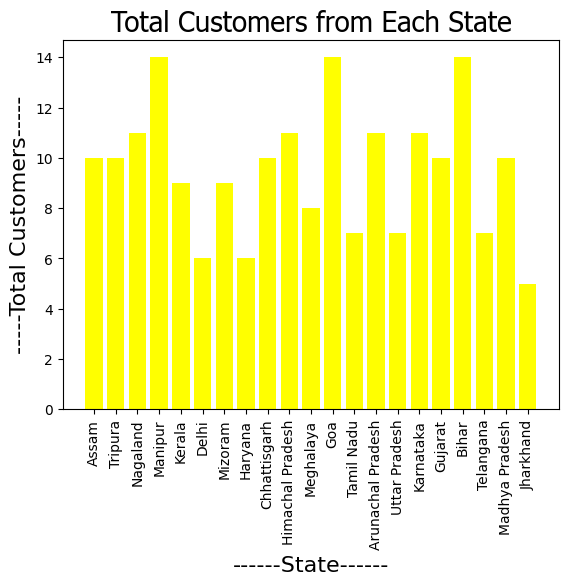

In [48]:
plt.bar(df["state"],df["TotalCustomers"],color="yellow")
plt.title("Total Customers from Each State",font="Tahoma",size=20)
plt.xlabel("------State------",size=16)
plt.ylabel("-----Total Customers-----",size=16)
plt.xticks(rotation =90)

In [49]:
## 8 

query = """ select s.subcatID, sc.subcatName, avg(quantity) AS AvgQuantity
FROM Salesdata s
INNER JOIN Subcategories sc ON s.subcatID = sc.subcatID
GROUP BY s.subcatID, sc.subcatName
ORDER BY AvgQuantity DESC;
"""
df = read_query(query)
df.head()
print(df)


    subcatID              subcatName AvgQuantity
0       6017        Resistance bands      3.1587
1       6024               Workbooks      3.1496
2       6011            Camping tent      3.1071
3       6019             Foam roller      3.0980
4       6005    Portable power banks      3.0974
5       6002                 Laptops      3.0821
6       6014                 Bicycle      3.0703
7       6026            Dog/cat food      3.0673
8       6021          Fiction novels      3.0637
9       6028                Pet beds      3.0504
10      6012           Running shoes      3.0344
11      6016         Fitness tracker      3.0296
12      6030     Leashes and collars      3.0253
13      6009             Instant Pot      3.0229
14      6013                Yoga mat      3.0213
15      6001             Smartphones      2.9975
16      6025        Children's books      2.9953
17      6010                 Blender      2.9738
18      6006            Coffee maker      2.9693
19      6027        

In [50]:
## 9

query = """select suppliername, sum(TotalPrice) as TotalSales
from SalesData as s
join subcategories sc on s.subcatid = sc.subcatid
join suppliers sp on sc.supplierid = sp.supplierid
group by suppliername 
order by TotalSales
limit 1;
"""
df = read_query(query)
df.head()
print(df)

  suppliername   TotalSales
0  Shere Group  11653186.00


In [51]:
## 10

query = """ select c.state, sum(totalPrice) as TotalRevenue 
from Salesdata s 
join customers c on s.customerid = c.customerid
group by c.state ;
"""
df = read_query(query)
print(df)
plt.show()

                state  TotalRevenue
0               Assam   91371978.00
1             Tripura   92329290.00
2            Nagaland   91511008.00
3             Manipur  122908203.00
4              Kerala   84668321.00
5               Delhi   53744487.00
6             Mizoram   76073281.00
7             Haryana   51660214.00
8        Chhattisgarh   91546717.00
9    Himachal Pradesh  102905140.00
10          Meghalaya   64990342.00
11                Goa  126990041.00
12         Tamil Nadu   65432759.00
13  Arunachal Pradesh   97340033.00
14      Uttar Pradesh   60176723.00
15          Karnataka   99671386.00
16            Gujarat   91624425.00
17              Bihar  126103984.00
18          Telangana   62742874.00
19     Madhya Pradesh   91859171.00
20          Jharkhand   43623711.00


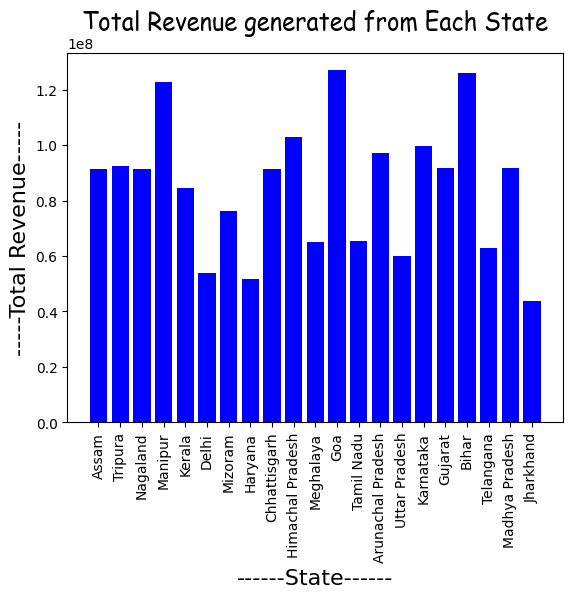

In [52]:
plt.bar(df["state"],df["TotalRevenue"],color="blue")
plt.title("Total Revenue generated from Each State",font="Comic Sans MS",size=17)
plt.xlabel("------State------",size=16)
plt.ylabel("-----Total Revenue-----",size=16)
plt.xticks(rotation =90)
plt.show()

In [53]:
## 11

query ="""SELECT c.FirstName , count(*) as totalsales
from salesdata s
join customers c on s.customerid = c.customerid
group by c.FirstName,s.customerid;
"""
df = read_query(query)
print(df)

    FirstName  totalsales
0      Mahika          66
1     Zeeshan          71
2       Aaina          61
3       Shray          74
4       Navya          63
..        ...         ...
195     Taran          56
196   Bhamini          69
197     Hunar          67
198     Riaan          57
199     Navya          67

[200 rows x 2 columns]


In [54]:
## 12 

query =""" select department , sum(salary) as TotalSalary
from employees 
group by department;
"""
df = read_query(query)
print(df)

    department TotalSalary
0    Marketing   469413.37
1        Legal   577095.43
2     Accounts   445848.85
3    Logistics   365835.92
4        Sales   325662.92
5  ML Engineer   652081.28
6     HR Admin   482618.09
7  Engineering   393266.08
8      Analyst   732044.77
9           IT   351627.51


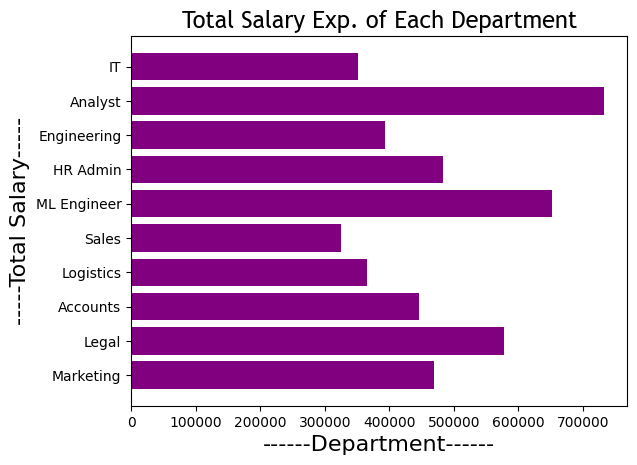

In [55]:
plt.barh(df["department"],df["TotalSalary"],color="purple")
plt.title("Total Salary Exp. of Each Department",font="Trebuchet MS",size=17)
plt.xlabel("------Department------",size=16)
plt.ylabel("-----Total Salary-----",size=16)
plt.show()

In [56]:
## 13 

query =""" select subcatname , avg(unitprice) as AverageUnitPrice
from subcategories
group by subcatname
order by AverageUnitPrice desc
limit 3;
"""
df = read_query(query)
print(df)

  subcatname AverageUnitPrice
0   Pet beds     94029.000000
1    Laptops     88216.000000
2  Air fryer     85039.000000


In [57]:
## 14

query =""" select c.categoryname , sum(TotalPrice) as TotalRevenue
from Salesdata s
join subcategories sc on s.subcatid = sc.subcatid
join categories c on sc.categoryid = c.categoryid
group by c.categoryname; 
"""
df = read_query(query)
print(df)

                      categoryname  TotalRevenue
0          Electronics and Gadgets  319374417.00
1      Home and Kitchen Appliances  269316684.00
2     Outdoor and Sports Equipment  231074739.00
3     Health and Wellness Products  324761329.00
4  Books and Educational Materials  282897933.00
5     Pet Supplies and Accessories  361848986.00


Text(0, 0.5, 'Total Revenue')

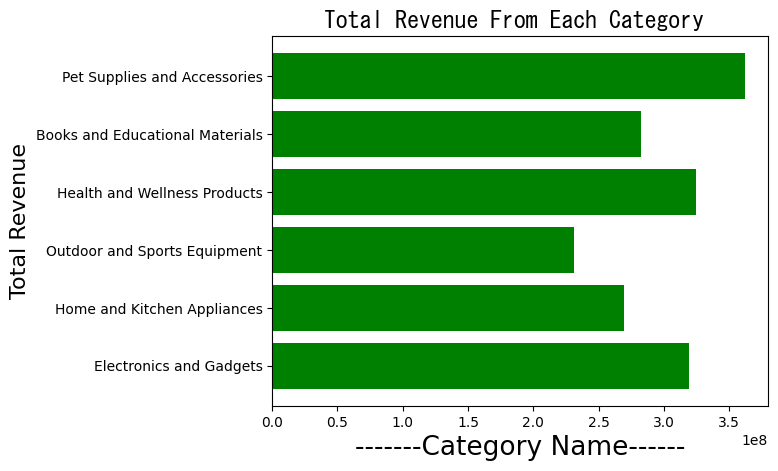

In [58]:
plt.barh(df['categoryname'],df['TotalRevenue'],color='Green')
plt.title("Total Revenue From Each Category " , font = "MS Gothic" , size = 17)
plt.xlabel("-------Category Name------",size=19)
plt.ylabel("Total Revenue",size=16)   
